In [0]:
import keras
from keras.datasets import mnist
from keras.utils import np_utils
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics

In [0]:
# Loading the Dataset

In [7]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
# Information Regarding Dataset

60000
10000
(60000, 28, 28)
(10000, 28, 28)
[0 1 2 3 4 5 6 7 8 9]


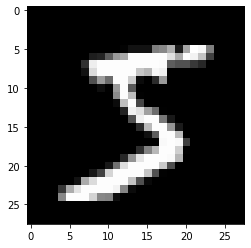

In [10]:
print(len(x_train))
print(len(x_test))
print(x_train.shape)
print(x_test.shape)
print(np.unique(y_test))
plt.imshow(x_train[0],cmap = 'gray')

In [0]:
x_train = x_train / 255
x_test = x_test / 255
y_train_cat = np_utils.to_categorical(y_train,10)
y_test_cat = np_utils.to_categorical(y_test,10)

x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [16]:
model = Sequential()
model.add(Conv2D(32,(4,4),input_shape = (28,28,1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(32,(4,4),input_shape = (28,28,1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 32)          16416     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [0]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop',metrics=['accuracy'])

In [20]:
model.fit(x_train,y_train_cat,
          epochs = 10,
          verbose = 1)

Epoch 1/10
60000/60000 [==============================] - 8s 126us/step - loss: 0.0261 - acc: 0.9921
Epoch 2/10
60000/60000 [==============================] - 8s 126us/step - loss: 0.0217 - acc: 0.9941
Epoch 3/10
60000/60000 [==============================] - 8s 127us/step - loss: 0.0190 - acc: 0.9946
Epoch 4/10
60000/60000 [==============================] - 8s 126us/step - loss: 0.0176 - acc: 0.9953
Epoch 5/10
60000/60000 [==============================] - 7s 124us/step - loss: 0.0156 - acc: 0.9957
Epoch 6/10
60000/60000 [==============================] - 7s 125us/step - loss: 0.0149 - acc: 0.9961
Epoch 7/10
60000/60000 [==============================] - 8s 127us/step - loss: 0.0128 - acc: 0.9968
Epoch 8/10
60000/60000 [==============================] - 8s 126us/step - loss: 0.0109 - acc: 0.9971
Epoch 9/10
60000/60000 [==============================] - 8s 125us/step - loss: 0.0102 - acc: 0.9974
Epoch 10/10
60000/60000 [==============================] - 8s 126us/step - loss: 0.0094 - a

In [21]:
model.evaluate(x_test,y_test_cat)

10000/10000 [==============================] - 1s 61us/step


[0.06107126493402252, 0.9908]

In [0]:
pred_class = model.predict_classes(x_test)

In [24]:
classreport = metrics.classification_report(y_test,pred_class)
print(classreport)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.97      0.99      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.98      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [25]:
confmatrix = metrics.confusion_matrix(y_test,pred_class)
print(confmatrix)

[[ 970    0    0    0    0    3    3    2    1    1]
 [   0 1130    0    1    0    1    3    0    0    0]
 [   1    3 1026    0    0    0    0    2    0    0]
 [   0    0    2  999    0    7    0    1    0    1]
 [   0    0    0    0  975    0    1    0    0    6]
 [   0    0    0    3    0  887    1    1    0    0]
 [   1    1    0    0    1    4  951    0    0    0]
 [   0    3    6    0    0    0    0 1016    0    3]
 [   2    0    2    2    1    5    1    1  958    2]
 [   0    0    0    1    5    5    1    1    0  996]]


In [0]:
# Cifar 10

In [0]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from sklearn.preprocessing import OneHotEncoder
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
%matplotlib inline

In [0]:
# Loading the cifar10 dataset

In [0]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

50000
10000
(50000, 32, 32, 3)
(10000, 32, 32, 3)
[0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Sample Images of the Datasets')

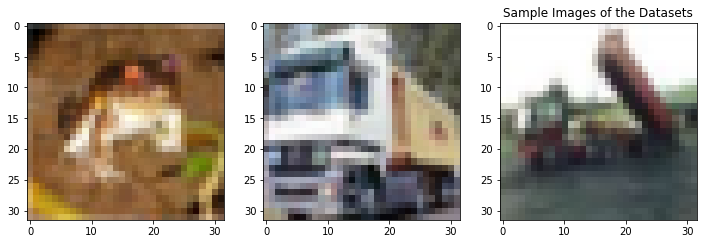

In [4]:
print(len(x_train))
print(len(x_test))
print(x_train.shape)
print(x_test.shape)
print(np.unique(y_test))
plt.figure(figsize=(12,12))
plt.subplot(1,3,1)
plt.imshow(x_train[0])
plt.subplot(1,3,2)
plt.imshow(x_train[1])
plt.subplot(1,3,3)
plt.imshow(x_train[2])

plt.title('Sample Images of the Datasets')

In [0]:
x_train = x_train / np.max(x_train)
x_test = x_test / np.max(x_test)

y_train_cat = np_utils.to_categorical(y_train,10)
y_test_cat = np_utils.to_categorical(y_test,10)

x_train = x_train.reshape(50000,32,32,3)
x_test = x_test.reshape(10000,32,32,3)

In [6]:
y_train_cat[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [7]:
x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [8]:
model = Sequential()

model.add(Conv2D(64,(4,4),input_shape = (32,32,3), activation = 'relu'))
model.add(Conv2D(32,(4,4),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64,(4,4),input_shape = (32,32,3), activation = 'relu'))
model.add(Conv2D(32,(4,4),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.summary()





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 29, 29, 64)        3136      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 32)        32800     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        32832     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 32)          32800     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 288)          

In [9]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [11]:
model.fit(x_train,y_train_cat,epochs=10,validation_split=0.10,verbose=1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
45000/45000 [==============================] - 9s 209us/step - loss: 1.4092 - acc: 0.4922 - val_loss: 1.6050 - val_acc: 0.4604
Epoch 2/10
45000/45000 [==============================] - 9s 203us/step - loss: 1.1689 - acc: 0.5909 - val_loss: 1.7357 - val_acc: 0.4220
Epoch 3/10
45000/45000 [==============================] - 9s 203us/step - loss: 1.0168 - acc: 0.6452 - val_loss: 1.2602 - val_acc: 0.5898
Epoch 4/10
45000/45000 [==============================] - 9s 207us/step - loss: 0.9250 - acc: 0.6791 - val_loss: 1.0029 - val_acc: 0.6606
Epoch 5/10
45000/45000 [==============================] - 9s 202us/step - loss: 0.8595 - acc: 0.7039 - val_loss: 1.1761 - val_acc: 0.6166
Epoch 6/10
45000/45000 [==============================] - 9s 202us/step - loss: 0.8048 - acc: 0.7219 - val_loss: 1.0899 - val_acc: 0.6514
Epoch 7/10
45000/45000 [==============================] - 9s 203us/step - loss: 0.7598 - acc: 0.7364 - val_loss: 0.9432 - v

In [12]:
model.evaluate(x_test,y_test_cat)

10000/10000 [==============================] - 1s 107us/step


[1.2503136952400207, 0.5991]

In [0]:
pred_class = model.predict_classes(x_test)

In [17]:
class_report  = metrics.classification_report(y_test,pred_class)
print(class_report)

              precision    recall  f1-score   support

           0       0.62      0.67      0.64      1000
           1       0.49      0.93      0.64      1000
           2       0.44      0.61      0.51      1000
           3       0.50      0.40      0.44      1000
           4       0.62      0.49      0.55      1000
           5       0.55      0.60      0.58      1000
           6       0.69      0.76      0.72      1000
           7       0.84      0.49      0.62      1000
           8       0.88      0.41      0.56      1000
           9       0.77      0.62      0.69      1000

    accuracy                           0.60     10000
   macro avg       0.64      0.60      0.60     10000
weighted avg       0.64      0.60      0.60     10000



In [20]:
conf_matrix = metrics.confusion_matrix(y_test,pred_class)
print(conf_matrix)

[[671 153  68  22  18   2  16   8  23  19]
 [  8 933  11   5   3   3  12   0   4  21]
 [ 88  28 609  60  44  66  66  12   6  21]
 [ 36  47 132 398  50 211  91  11   3  21]
 [ 36  30 160  83 489  62  91  29   6  14]
 [ 37  30 143  86  36 605  32  22   1   8]
 [ 10  36  84  43  11  36 760   5   0  15]
 [ 28  31 119  62 120 101  23 489   1  26]
 [129 356  26  20  10   4   4   1 414  36]
 [ 39 259  25  12   3  13   8   6  12 623]]


In [0]:
# after 100 epochs

In [23]:
model.fit(x_train,y_train_cat,epochs = 100,verbose=1,validation_split=0.10)

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
45000/45000 [==============================] - 9s 204us/step - loss: 0.7131 - acc: 0.7630 - val_loss: 0.9668 - val_acc: 0.7132
Epoch 2/100
45000/45000 [==============================] - 9s 208us/step - loss: 0.7101 - acc: 0.7652 - val_loss: 0.9271 - val_acc: 0.7042
Epoch 3/100
45000/45000 [==============================] - 9s 205us/step - loss: 0.7138 - acc: 0.7659 - val_loss: 1.4677 - val_acc: 0.6440
Epoch 4/100
45000/45000 [==============================] - 9s 202us/step - loss: 0.7168 - acc: 0.7648 - val_loss: 1.7149 - val_acc: 0.6486
Epoch 5/100
45000/45000 [==============================] - 9s 207us/step - loss: 0.7207 - acc: 0.7655 - val_loss: 1.2548 - val_acc: 0.6970
Epoch 6/100
45000/45000 [==============================] - 9s 200us/step - loss: 0.7273 - acc: 0.7626 - val_loss: 1.0706 - val_acc: 0.6756
Epoch 7/100
45000/45000 [==============================] - 9s 201us/step - loss: 0.7393 - acc: 0.7598 - val_loss: 1.6

In [24]:
model.evaluate(x_test,y_test_cat)

10000/10000 [==============================] - 1s 104us/step


[1.3274515935897828, 0.5866]